# Importações

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m

# Mínimos Quadrados 


In [3]:
população = pd.DataFrame(np.array([
        [1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010], 
        [9.9,14.3,17.4,30.6,41.2,51.9,70.9,94.5,121.1,146.9,169.5,190.7]]).T, 
         columns=["Ano", "População"])
população

,Ano,População
0,1872.0,9.9
1,1890.0,14.3
2,1900.0,17.4
3,1920.0,30.6
4,1940.0,41.2
5,1950.0,51.9
6,1960.0,70.9
7,1970.0,94.5
8,1980.0,121.1
9,1991.0,146.9


## Gráfico do crescimento Populacional no Brasil

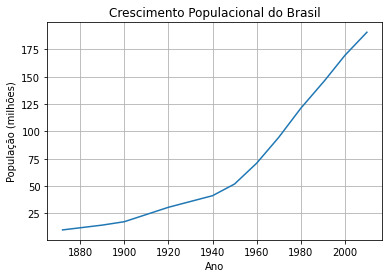

In [4]:
plt.title("Crescimento Populacional do Brasil")
plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.plot(população.Ano, população.População )
# plt.semilogy()
plt.grid()

## Funções utilizada

In [5]:
def fatoraCholesky(A):
    H = np.tril(A)
    n = np.shape(H)[0]

    for i in np.arange(n):
        for k in np.arange(i+1):
            tmp_sum = sum(H[i][j] * H[k][j] for j in np.arange(k))
            if (i == k):
                H[i][k] = m.sqrt(H[i][k] - tmp_sum)
            else:
                H[i][k] = (1.0 / H[k][k] * (H[i][k] - tmp_sum))
    return H

def sub_regressiva(U,y):
    n = np.shape(y)[0]
    x = np.zeros(n)
    for i in np.arange(n-1,-1,-1): 
        x[i] = (y[i]-U[i,i+1:n].dot(x[i+1:n]))/U[i,i]
    return x

def sub_progressiva(L,b):
    n = np.shape(b)[0]
    z = np.zeros(n)
    for i in np.arange(n):
        z[i] = (b[i]-L[i,0:i].dot(z[0:i]))/L[i,i] 
    return z        


def mmq(U, y, k):
    n = len(y) - 1
    A = np.zeros([k, k])
    b = np.zeros(k)

    for i in range(0, k):
        for j in range(0, k):
            A[i][j] = np.dot(U[i], U[j])
        b[i] = np.dot(U[i], y)
    return A, b

def erro(y, variables, k, erro):
    parabola  = lambda x, a1, a2, a3: a1 + a2*x + a3 * x**2
    linear = lambda x, a, b: b*x+a
    erro = 0
    
    if(erro == 0):
        for i in range(0, k - 1):
            erro += (y[k] - linear(k, variables[0], variables[1]))**2 
    else:
        for i in range(0, k - 1):
            erro += (y[k] - parabola(k, variables[0], variables[1], variables[2]))**2 
    return erro

## Linear

In [6]:
y = np.array(população.População, dtype="double")
X = np.array(população.Ano, dtype="double").T

linear = lambda x, a, b: b*x+a

u0 = np.ones(len(X)).T
u1 = np.array(X, dtype="double").T
U = np.array([u0, u1], dtype="double")

A, b = mmq(U, y, 2)


(H) = fatoraCholesky(A)
z = sub_progressiva(H,b)
alpha = sub_regressiva(np.transpose(H),z)

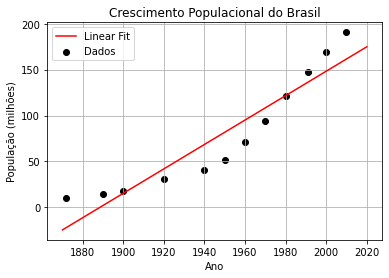

In [7]:
a, b = alpha

error = erro(y, [a, b], 2, 0)
 
xx = np.linspace(1870, 2020, 20)
yy = linear(xx, a, b)

plt.title("Crescimento Populacional do Brasil")
plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.scatter(população.Ano, população.População, label="Dados", color="black")
plt.plot(xx, yy, label="Linear Fit",  color="red")
plt.legend()
plt.grid()

In [8]:
print("A estimativa da população, de forma linear, é igual a: {:.2f} milhões".format(linear(2020, a, b)))
# print("O erro estimado é: {:.2f}" .format(error))

A estimativa da população, de forma linear, é igual a: 174.85 milhões


## Parabólico

In [9]:
y = np.array(população.População, dtype="double")
X = np.array(população.Ano, dtype="double").T

u0 = np.ones(len(X)).T
u1 = np.array(X, dtype="double").T
u2 = np.array([i**2for i in X], dtype="double").T
U = np.array([u0, u1, u2], dtype="double")

A, b = mmq(U, y, 3)

(H) = fatoraCholesky(A)
z = sub_progressiva(H,b)
alpha = sub_regressiva(np.transpose(H),z)

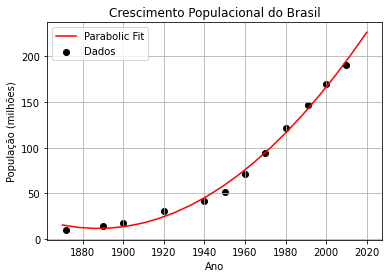

In [10]:
a1, a2, a3 = alpha
parabola  = lambda x, a1, a2, a3: a1 + a2*x + a3 * x**2

error = erro(y, [a1, a2, a3], 3, 1)

xx = np.linspace(1870, 2020, 20)
yy = parabola(xx, a1, a2, a3)

plt.title("Crescimento Populacional do Brasil")
plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.scatter(população.Ano, população.População, label="Dados", color="black")
plt.plot(xx, yy, label="Parabolic Fit",  color="red")
plt.legend()
plt.grid()

A estimativa é feita utilizando da função obtida com os mínimos quadrados, ou linear, e, com isso, vc faz coloca o valor de 2020 e obtem o número da população naquele ano.

In [11]:
print("A estimativa da população é igual a: {:.2f} milhões".format(parabola(2020,  a1, a2, a3)))
# print("O erro é: {:.2f}".format(error))

A estimativa da população é igual a: 226.45 milhões


# Equações Diferencias Ordinárias 



                


## Modelo Kermack-McKendrick

$$\begin{bmatrix}
    S^{'}_{(t)} \\
    I^{'}_{(t)} \\
    R^{'}_{(t)} \\
\end{bmatrix}  = \begin{bmatrix} 
                    -b S(t) I(t) \\
                    b S(t) I(t) - a I(t) \\
                    a I(t) \\
                \end{bmatrix}$$
                
                
                
$S(t) \rightarrow$ Indivíduos suscetíveis

$T(t) \rightarrow$ Indivíduos infectados

$R(t) \rightarrow$ Indivíduos removidos (isolados, recuperados, mortos ou imunes)

$a \rightarrow$ Taxa de recuperação

$b \rightarrow$ Taxa de contágio


## Runge Kutta

In [12]:
def rk4_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k1);
        k3 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k2);
        k4 = F(x[i-1]+h,Y[:,i-1]+h*k3);

        Y[:,i] = Y[:,i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return Y;


**a)** $b = 0.0007$


In [13]:
a = 0.1
b = 0.0007
S = 999
I = 1
R = 0
t0 = 0
tf = 70

In [14]:
Y = [S, I, R]

F = lambda x,Y: np.array([- b * Y[0] * Y[1], b * Y[0] * Y[1] - a * Y[1]]);
# F = lambda x,Y: np.array([Y[0]*(a-b*Y[1]),Y[1]*(-a+b*Y[0])]);


Y0 = np.array([999,1])
h = 0.001;
n = int((70-0)/h);
x = np.linspace(0,70,n+1,endpoint=True);

Y_rk4 = rk4_sys(x,h,F,Y0);
Recuperados =  Y_rk4[1,:] * a

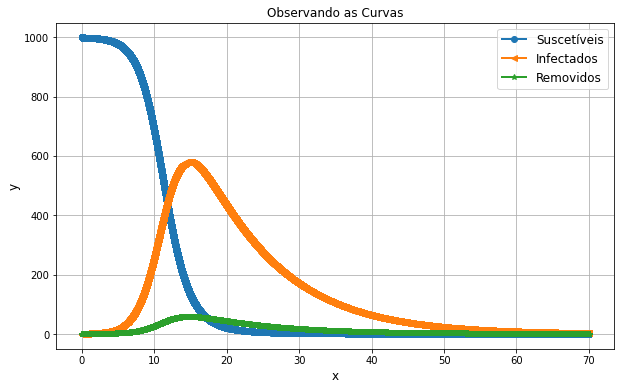

In [15]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,Y_rk4[0,:],label = 'Suscetíveis',linewidth = 2,marker='o')
plt.plot(x,Y_rk4[1,:],label = 'Infectados',linewidth = 2,marker='<')
plt.plot(x,Recuperados,label = 'Removidos',linewidth = 2,marker='*')
plt.xlabel('x',fontsize='large') 
plt.grid()
plt.ylabel('y',fontsize='large') 
plt.title('Observando as Curvas') 
plt.legend(fontsize='large') 
plt.show()

In [16]:
pico_pandemia = np.max(Y_rk4[1,:])
print("O Pico da pandemia com {:.2f} casos foi no dia {:.0f} " .format( pico_pandemia, np.where(Y_rk4[1] == pico_pandemia)[0][0] *h))

O Pico da pandemia com 579.30 casos foi no dia 15 


**b)**  $b = 0.0004$


In [17]:
a = 0.1
b = 0.0004
S = 999
I = 1
R = 0
t0 = 0
tf = 70

In [18]:
Y = [S, I, R]

F = lambda x,Y: np.array([- b * Y[0] * Y[1], b * Y[0] * Y[1] - a * Y[1]]);

Y0 = np.array([999,1])
h = 0.001;
n = int((70-0)/h);
x = np.linspace(0,70,n+1,endpoint=True);

Y_rk4 = rk4_sys(x,h,F,Y0);
Recuperados =  Y_rk4[1,:] * a

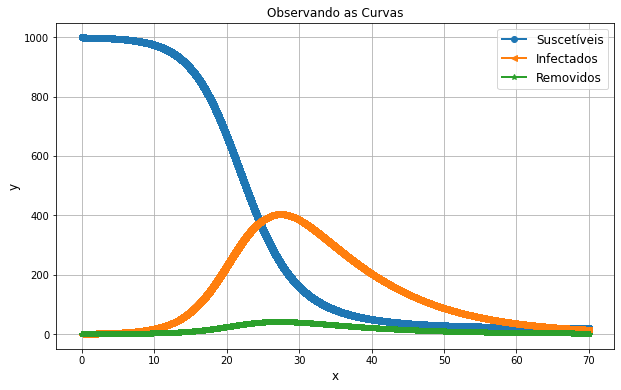

In [19]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,Y_rk4[0,:],label = 'Suscetíveis',linewidth = 2,marker='o')
plt.plot(x,Y_rk4[1,:],label = 'Infectados',linewidth = 2,marker='<')
plt.plot(x,Recuperados,label = 'Removidos',linewidth = 2,marker='*')
plt.xlabel('x',fontsize='large') 
plt.grid()
plt.ylabel('y',fontsize='large') 
plt.title('Observando as Curvas') 
plt.legend(fontsize='large') 
plt.show()

In [20]:
pico_pandemia = np.max(Y_rk4[1,:])
print("O Pico da pandemia com {:.2f} casos foi no dia {:.0f} " .format( pico_pandemia, np.where(Y_rk4[1] == pico_pandemia)[0][0] *h))

O Pico da pandemia com 403.68 casos foi no dia 27 


# Zeros de funções e sistemas não lineares

$$p(x) = -x^4 + 7.7 x^3-18 x^2 + 13.6 x$$

$$q(x) = - x^2 +5x +0.75$$

Juntando as duas funções 

$$ -x^4 + 7.7 x^3-18 x^2+13.6 x =  - x^2 +5x +0.75$$

Arrumando...

$$ f(x) = - x^4 + 7.7 x^3 - 17 x^2 + 8.6  x - 0.75$$


Sua derivada (para Newton):

$$ f^{´}(x) = - 4  x^3 + 23.1  x^2 - 34  x +8.6$$

In [21]:
p = lambda x:  -x**4+7.7*x**3-18*x**2+13.6*x
q = lambda x:  -x**2+5*x+0.75

f = lambda x: - x**4 + 7.7 * x**3 - 17* x**2 + 8.6 * x - 0.75 
df = lambda x: - 4 * x**3 + 23.1 * x**2 - 34 * x +8.6

## Bisseção

In [22]:
def bissecao(func,a,b,x0,tol,flag_parada):
            x = x0; erro = np.inf;
            k = 0; kmax = 5;
        
            while(erro > tol and k < kmax):
                k += 1;
                if(func(a) * func(x) < 0):
                    b = x;
                else:
                    a = x;
                
                x0 = x;
                x = (a + b) / 2;
                
                # cálculo do erro vai depender do critério de parada escolhido
                if(flag_parada == 0):
                    erro = abs(x - x0);
                elif(flag_parada == 1):
                    erro = abs(x - x0) / abs(x);
                else:
                    erro = abs(func(x));
            return x,  erro

### Com erro comparativo

In [23]:
x, erroBissecao =  bissecao(f, 2, 4, 0, 0.001, 0)
alturaBissecao = p(x)
print(f"Altura atingida: {alturaBissecao} com um erro igual a: {erroBissecao}")

Altura atingida: 6.336669921875 com um erro igual a: 0.125


### Com erro relativo

In [24]:
x, erroBissecao =  bissecao(f, 2, 4, 0, 0.001, 1)
alturaBissecao = p(x)
print(f"Altura atingida: {alturaBissecao} com um erro igual a: {erroBissecao}")

Altura atingida: 6.336669921875 com um erro igual a: 0.04


### Com erro absoluto

In [25]:
x, erroBissecao =  bissecao(f, 2, 4, 0, 0.001, 2)
alturaBissecao = p(x)
print(f"Altura atingida: {alturaBissecao} com um erro igual a: {erroBissecao}")

Altura atingida: 6.336669921875 com um erro igual a: 0.272705078125


## Newton

In [26]:
def newton(func,dfunc,x0,tol,flag_parada):
            x = x0; erro = np.inf;
            k = 0; kmax = 1000;
        
            while(erro > tol and k < kmax):
                k = k + 1;
                x0 = x;
                dx = func(x) / dfunc(x);
                x = x - dx;
                
                # cálculo do erro vai depender do critério de parada escolhido
                if(flag_parada == 0):
                    erro = abs(x-x0);
                elif(flag_parada == 1):
                    erro = abs(x-x0)/abs(x);
                else:
                    erro = abs(func(x));
            
            return x, erro

### Com erro comparativo 

In [33]:
x,erroNewton = newton(f,df,2,0.001,0)
alturaNewton = p(x)
# print(f"Altura atingida: {alturaNewton} com um erro igual a: {erroNewton}")
print("Altura atingida: {:.5f} com um erro igual a: {:.5f}".format(alturaNewton, erroNewton))

Altura atingida: 5.15020 com um erro igual a: 0.00003


### Com erro relativo 

In [32]:
x,erroNewton = newton(f,df,2,0.001,1)
alturaNewton = p(x)
print("Altura atingida: {:.6f} com um erro igual a: {:.6f}".format(alturaNewton, erroNewton))

Altura atingida: 5.150198 com um erro igual a: 0.000008


### Com erro absoluto

In [31]:
x,erroNewton = newton(f,df,2,0.001,2)
alturaNewton = p(x)
print("Altura atingida: {:.4f} com um erro igual a: {:.4f}".format(alturaNewton, erroNewton))

Altura atingida: 5.1498 com um erro igual a: 0.0003


## Conclusão 


| Critério  |  Bisseção (erro) | Newton (erro) | 
|---|---|---|
|  Comparativo | 0.125  | 3.206174172065701e-05  | 
| Absoluto  |  0.272705078125 |   0.00027293278139950417 | 
|  Relativo |0.04   |  8.305991144021625e-06  |  

Observa-se que, independente do critério de parada utilizado, o método de Newton é mais preciso para achar a raíz da função. 



In [30]:
# X  = np.array([-1, 0, 1,2 ], dtype="double")
# y   = np.array([0, -1, 0,7 ], dtype="double")

# # Parabolico 
# u0 = np.ones(len(X)).T
# u1 = np.array(X, dtype="double").T
# u2 = np.array([i**2for i in X], dtype="double").T
# U = np.array([u0, u1, u2], dtype="double")


# A, b = mmq(U, y, 3)

# (H) = fatoraCholesky(A)
# z = sub_progressiva(H,b)
# alpha = sub_regressiva(np.transpose(H),z)

# print(alpha)